# Adding multiple chips to wafer

In [396]:

import os
import phidl.geometry as pg
from phidl import Device, quickplot as qp
import numpy as np
from utilities import *

# Create a blank wafer layout
wafer = Device("Jaddu_coherence_qubits_juncs")

# Add wafer outline (2-inch wafer = 5.08 cm = 50,800 um diameter)
wafer_radius = 45000   # um
wafer << pg.circle(radius=wafer_radius, layer=0)


DeviceReference (parent Device "circle", ports [], origin (0, 0), rotation 0, x_reflection False)

In [397]:
activate_booleans = {
    'coherence-qubits': True,
    'ion-milling': False,
    'multimode-coupler': False,
    'multimode-qubit': False
}

# Coherence Junctions Triad_half

In [398]:
juncs_triad_upper_half_x_offset = 0 
# juncs_triad_lower_half_y_offset = 0

## Multimode Qubit

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


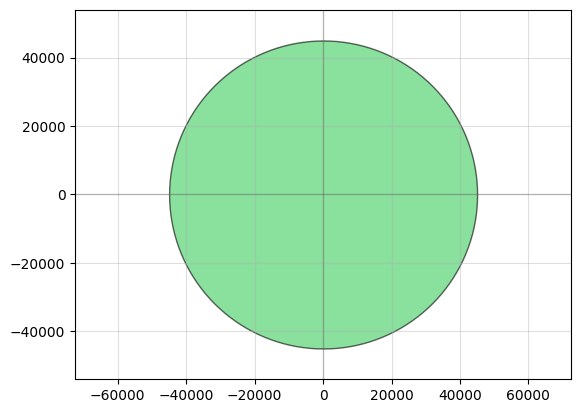

In [399]:

# Qubits 
# Define path to DXF file to import
qubit_chip_width = 2000 # um 
# path = r"C:\Users\eeshg\Documents\multimode_sims\Design\coupler"  # <-- UPDATE THIS
path = ''
with open("multimode/chip_names_qubit.txt", "r") as f:
    chip_names_read = [line.strip() for line in f.readlines()]
upper_dxf_files = chip_names_read[:5]
lower_dxf_files = chip_names_read[-5:]


# x pos and y pos offsets for the qubit chips
xpos_offset = -7000 - 20000 + 1251.5 -1.5  + juncs_triad_upper_half_x_offset # um
ypos_offset = 500 + 4500 -1.5+2500   # um

# Import the GDS structure
if activate_booleans['multimode-qubit']:
    for idx, file in enumerate(upper_dxf_files):
        wafer, qubit_gap, qubit_pin = add_dxf_chip_to_wafer_junc(wafer, file, path, qubit_chip_width, idx, x_offset=xpos_offset, y_offset=ypos_offset, add_bool=True)
        qubit_gap.rotate(-90)  # Rotate the qubit chip by 90 degrees
        qubit_pin.rotate(-90)  # Rotate the bounding box by 90 degrees

# Save the resulting wafer layout
wafer.write_gds("wafer_with_imported_dxf.gds")

# Quick preview (optional)
qp(wafer)



## Coherence Transmons

In [400]:
folder_lab_designs = "lab_designs/"
coh_trans_files = [
    folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.1_offset0.0.gds",
    folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.2_offset0.0.gds",
    folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds"
]

In [401]:
def add_coherence_qubits(
    wafer_device,
    x_offset,
    y_offset,
    qubit_gds=None,
    bbox_size=7000,
    spacing=None,
    num_qubits=1,
    layer_in = 5, 
    layer_out = 5
):
    if spacing is None:
        spacing = 7000

    # Initialize arrays for X and Y coordinates
    blank_x_arr = np.array([0] * num_qubits)
    blank_y_arr = np.array([0] * num_qubits)

    blank_x_arr = blank_x_arr - bbox_size / 2 + x_offset
    blank_y_arr = blank_y_arr - bbox_size / 2 + y_offset
    # blank_x_arr = #[blank_x_arr[i] + (i) * spacing for i in range(num_qubits)]
    blank_y_arr = [blank_y_arr[i] + (i) * spacing for i in range(num_qubits)]

    for i in range(num_qubits):
        qubit_raw = pg.import_gds(qubit_gds)
        print(qubit_raw.layers)
        print(layer_in)
        print(layer_out)
        qubit_pos = pg.copy_layer(qubit_raw, layer=layer_in, new_layer=layer_out)
        qubit_bbox = pg.rectangle(size=(bbox_size, bbox_size), layer=13).move((-bbox_size / 2, -bbox_size / 2))
        dicing_lane_width = 0

        wafer_device << qubit_pos.move((blank_x_arr[i] + bbox_size / 2, blank_y_arr[i] + bbox_size / 2))
        # wafer_device << qubit_bbox.move((blank_x_arr[i] + bbox_size / 2 - 50, blank_y_arr[i] + bbox_size / 2))

        xmax = qubit_bbox.xmax
        xmin = qubit_bbox.xmin
        ymax = qubit_bbox.ymax
        ymin = qubit_bbox.ymin

        # qubit_pos << pg.cross(length=250, width=100, layer=3).move((xmax + dicing_lane_width / 2, ymax + dicing_lane_width / 2))
        # qubit_pos << pg.cross(length=250, width=100, layer=3).move((xmax + dicing_lane_width / 2, ymin - dicing_lane_width / 2))
        # qubit_pos << pg.cross(length=250, width=100, layer=3).move((xmin - dicing_lane_width / 2, ymax + dicing_lane_width / 2))
        # qubit_pos << pg.cross(length=250, width=100, layer=3).move((xmin - dicing_lane_width / 2, ymin - dicing_lane_width / 2))


In [402]:

x_offset = 12000 + juncs_triad_upper_half_x_offset
y_offset = 10000 - 5000 
num_copies = 2

if activate_booleans['coherence-qubits']:
    for idx, file in enumerate(coh_trans_files):
        add_coherence_qubits(wafer, x_offset=x_offset + idx*7000,
                            y_offset=y_offset, 
                            num_qubits=num_copies, qubit_gds=file, 
                            layer_in=np.int64(20), layer_out=np.int64(3))
        #undercut 
        add_coherence_qubits(wafer, x_offset=x_offset + idx*7000,
                            y_offset=y_offset, 
                            num_qubits=num_copies, qubit_gds=file, 
                            layer_in=np.int64(60), layer_out=np.int64(2))

{np.int64(5), np.int64(299), np.int64(20), np.int64(699), np.int64(60)}
20
3
{np.int64(5), np.int64(299), np.int64(20), np.int64(699), np.int64(60)}
20
3
{np.int64(5), np.int64(299), np.int64(20), np.int64(699), np.int64(60)}
60
2
{np.int64(5), np.int64(299), np.int64(20), np.int64(699), np.int64(60)}
60
2
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
20
3
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
20
3
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
60
2
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
60
2
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
20
3
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
20
3
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
60
2
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
60
2


In [403]:
wafer.write_gds("wafer_with_imported_dxf.gds")

'wafer_with_imported_dxf.gds'

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


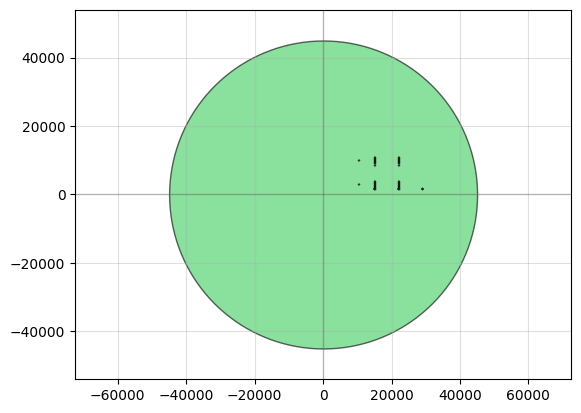

In [404]:
qp(wafer)

## Ion Milling Mask

In [405]:
def add_ion_milling_mask(
    wafer_device,
    x_offset,
    y_offset,
    qubit_gds=None,
    bbox_size=7000,
    spacing=None,
    num_qubits=1,
    layer_in=1,
    layer_out=5
):
    if spacing is None:
        spacing = 7000

    # Initialize arrays for X and Y coordinates
    blank_x_arr = np.array([0] * num_qubits)
    blank_y_arr = np.array([0] * num_qubits)

    blank_x_arr = blank_x_arr - bbox_size / 2 + x_offset
    blank_y_arr = blank_y_arr - bbox_size / 2 + y_offset
    # blank_x_arr = #[blank_x_arr[i] + (i) * spacing for i in range(num_qubits)]
    blank_y_arr = [blank_y_arr[i] + (i) * spacing for i in range(num_qubits)]

    for i in range(num_qubits):
        qubit_raw = pg.import_gds(qubit_gds)
        qubit_pos = pg.copy_layer(qubit_raw, layer=layer_in, new_layer=layer_out).move((-bbox_size / 2, -bbox_size / 2))
        qubit_bbox = pg.rectangle(size=(bbox_size, bbox_size), layer=13).move((-bbox_size / 2, -bbox_size / 2))
        dicing_lane_width = 0

        wafer_device << qubit_pos.move((blank_x_arr[i] + bbox_size / 2 + 50, blank_y_arr[i] + bbox_size / 2 + 100))
        # wafer_device << qubit_bbox.move((blank_x_arr[i] + bbox_size / 2 - 50, blank_y_arr[i] + bbox_size / 2))

        xmax = qubit_bbox.xmax
        xmin = qubit_bbox.xmin
        ymax = qubit_bbox.ymax
        ymin = qubit_bbox.ymin

        # qubit_pos << pg.cross(length=250, width=100, layer=3).move((xmax + dicing_lane_width / 2, ymax + dicing_lane_width / 2))
        # qubit_pos << pg.cross(length=250, width=100, layer=3).move((xmax + dicing_lane_width / 2, ymin - dicing_lane_width / 2))
        # qubit_pos << pg.cross(length=250, width=100, layer=3).move((xmin - dicing_lane_width / 2, ymax + dicing_lane_width / 2))
        # qubit_pos << pg.cross(length=250, width=100, layer=3).move((xmin - dicing_lane_width / 2, ymin - dicing_lane_width / 2))


In [406]:
x_offset = 12000 + juncs_triad_upper_half_x_offset + 7000*3 
y_offset = 10000 - 5000 #+ 3700
num_copies = 1
ion_milling_file = folder_lab_designs + "ion_mill_mask_v5.gds"
# for idx, file in enumerate(coh_trans_files):
if activate_booleans['ion-milling']:
    add_ion_milling_mask(wafer, x_offset=x_offset,
                            y_offset=y_offset,
                            num_qubits=1, qubit_gds=ion_milling_file,
                            layer_in=2, layer_out=3)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


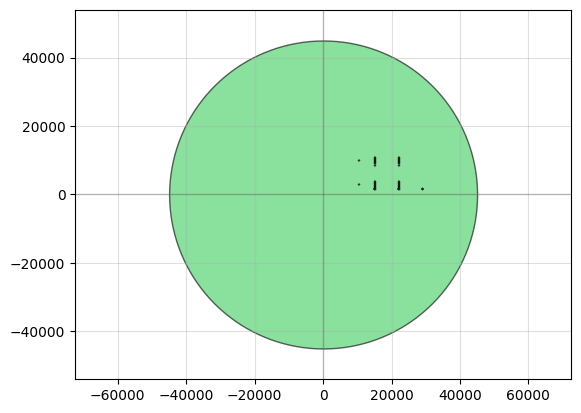

In [407]:
wafer.write_gds("wafer_with_imported_dxf.gds")
qp(wafer)

## Multimode Coupler Test Structures

In [408]:
#Make the following code into a function : add bounding boxes and return negative mas 
# it should take arguments wafer, coupler_chip_obj, coupler_width, idx
# and return the wafer with the negative mask added
# only the coupler text_bbox remain (no coupler chip)
import phidl.geometry as pg

def add_test_structure_positive_mask(wafer, coupler_chip_obj, coupler_width, idx, xpos_offset, ypos_offset,
                                     layer_out = 5):
    coupler_length = 48500
    test_structure_length = 4500

    xpos = xpos_offset + (idx * coupler_width)
    ypos = ypos_offset

    # (Optional) draw the visual bounding boxes as before
    # coupler_bbox = pg.rectangle(size=(coupler_width, coupler_length), layer=13)
    # wafer << coupler_bbox.move((xpos - 100, ypos - 100))

    # test_structure_bbox_vis = pg.rectangle(size=(coupler_width, test_structure_length), layer=13)
    # wafer << test_structure_bbox_vis.move((xpos - 100, ypos + coupler_length - 100))

    # ---- KEY CHANGE ----
    # Build a *test-structures-only* window in the coupler_chip_obj's local coords,
    # then subtract the coupler geometry from that window.
    test_structure_window = pg.rectangle(size=(coupler_width, test_structure_length), layer=14)
    test_structure_window.move((-100, coupler_length - 100))  # place directly above the coupler region

    # A \ B keeps ONLY the top test-structure band and removes whatever the coupler object occupies there
    test_structures_negative = pg.boolean(
        A=test_structure_window,
        B=coupler_chip_obj,
        operation='not',     # A minus B (no reintroduction of the bottom chip)
        layer=layer_out,
        precision=1e-3
    )
    test_structures_positive = pg.boolean(
            A=test_structure_window,
            B=test_structures_negative,
            operation='xor',     # A minus B (no reintroduction of the bottom chip)
            layer=layer_out,
            precision=1e-3
        )
    # test_structures_positive = pg.boolean(
    #     A=None,
    #     B=test_structures_negative,
    #     operation='not',     # A minus B (no reintroduction of the bottom chip)
    #     layer=layer_out,
    #     precision=1e-3
    # )

    wafer << test_structures_positive.move((xpos, ypos))
    return wafer


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


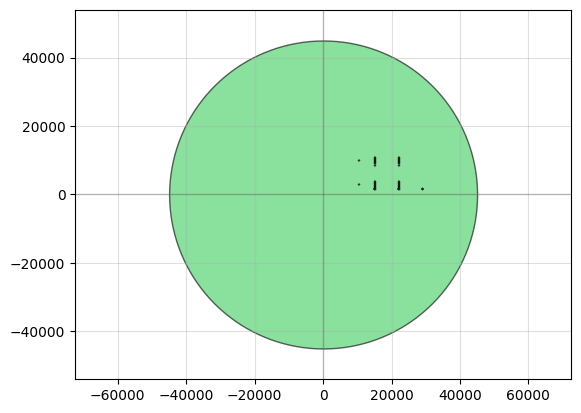

In [409]:
with open("multimode/chip_names_coupler.txt", "r") as f:
    chip_names_read = [line.strip() for line in f.readlines()]
coupler_files = chip_names_read[:3]
coupler_width = 5650

coupler_test_xoffset = 8000 + juncs_triad_upper_half_x_offset
coupler_test_yoffset = -20000 #+ juncs_triad_lower_half_y_offset
# Import the GDS structurep
if activate_booleans['multimode-coupler']:
    for idx, file in enumerate(coupler_files):
        #fulcut
        wafer, coupler_chip_obj = add_dxf_chip_to_wafer(wafer, file, path, coupler_width, idx, x_offset=0, y_offset=0,
                                                        add_bool = False, layer_in=3, layer_out=3)

        wafer = add_test_structure_positive_mask(wafer, coupler_chip_obj, coupler_width, idx, xpos_offset=coupler_test_xoffset, ypos_offset=coupler_test_yoffset, 
                                                layer_out=3)
        #undercut
        wafer, coupler_chip_obj = add_dxf_chip_to_wafer(wafer, file, path, coupler_width, idx, x_offset=0, y_offset=0,
                                                        add_bool = False, layer_in=2, layer_out=2)

        wafer = add_test_structure_positive_mask(wafer, coupler_chip_obj, coupler_width, idx, xpos_offset=coupler_test_xoffset, ypos_offset=coupler_test_yoffset, 
                                                layer_out=2)
qp(wafer)

## Bottom half of triad 


In [410]:
coh_juncs_bottom_half_x_offset = 0
coh_juncs_bottom_half_y_offset = -34000

In [411]:
# draw multimode qubit, coherence qubits and coupler test structures but on lower half 

# Multimode Qubits (lower half)
qubit_chip_width = 2000
xpos_offset_down = -7000 - 20000 + 1251.5 - 1.5 - 1500+44100  - coh_juncs_bottom_half_x_offset # same as above
ypos_offset_down = 500 + 4500 -1.5+2500   # lower half y offset

if activate_booleans['multimode-qubit']:
    for idx, file in enumerate(lower_dxf_files):
        wafer, qubit_gap, qubit_pin = add_dxf_chip_to_wafer_junc(wafer, file, path, qubit_chip_width, idx, x_offset=xpos_offset_down, y_offset=ypos_offset_down, add_bool=True)
        qubit_gap.rotate(-90)  # Rotate the qubit chip by 90 degrees
        qubit_pin.rotate(-90)  # Rotate the bounding box by 90 degrees

# Coherence Qubits (lower half)
x_offset_down = 12000
y_offset_down = 5000 + coh_juncs_bottom_half_y_offset + 17000
num_copies = 2
if activate_booleans['coherence-qubits']:
    for idx, file in enumerate(coh_trans_files):
        add_coherence_qubits(wafer, x_offset=x_offset_down + idx*7000,
                             y_offset=y_offset_down,
                             num_qubits=num_copies, qubit_gds=file, layer_in = 20, layer_out = 3)
        #undercut
        add_coherence_qubits(wafer, x_offset=x_offset_down + idx*7000,
                         y_offset=y_offset_down,
                         num_qubits=num_copies, qubit_gds=file, layer_in = 60, layer_out = 2)

#ion milling mask
x_offset = 12000 + juncs_triad_upper_half_x_offset + 7000*3 
y_offset = 5000 + coh_juncs_bottom_half_y_offset + 17000
num_copies = 1
ion_milling_file = folder_lab_designs + "ion_mill_mask_v5.gds"
# for idx, file in enumerate(coh_trans_files):
if activate_booleans['ion-milling']:
    add_ion_milling_mask(wafer, x_offset=x_offset,
                            y_offset=y_offset,
                            num_qubits=1, qubit_gds=ion_milling_file,
                            layer_in=2, layer_out=3)


# Coupler Test Structures (lower half)
coupler_test_xoffset_down = 8000
coupler_test_yoffset_down = -20000 + coh_juncs_bottom_half_y_offset - 26000
if activate_booleans['multimode-coupler']:
    for idx, file in enumerate(coupler_files):
        #full cut
        wafer, coupler_chip_obj = add_dxf_chip_to_wafer(wafer, file, path, coupler_width, idx, x_offset=0, y_offset=0, add_bool=False, layer_in=3, layer_out=3)
        wafer = add_test_structure_positive_mask(wafer, coupler_chip_obj, coupler_width, idx, xpos_offset=coupler_test_xoffset_down, ypos_offset=coupler_test_yoffset_down, layer_out=3)
        #undercut
        wafer, coupler_chip_obj = add_dxf_chip_to_wafer(wafer, file, path, coupler_width, idx, x_offset=0, y_offset=0, add_bool=False, layer_in=2, layer_out=2)
        wafer = add_test_structure_positive_mask(wafer, coupler_chip_obj, coupler_width, idx, xpos_offset=coupler_test_xoffset_down, ypos_offset=coupler_test_yoffset_down, layer_out=2)

{np.int64(5), np.int64(299), np.int64(20), np.int64(699), np.int64(60)}
20
3
{np.int64(5), np.int64(299), np.int64(20), np.int64(699), np.int64(60)}
20
3
{np.int64(5), np.int64(299), np.int64(20), np.int64(699), np.int64(60)}
60
2
{np.int64(5), np.int64(299), np.int64(20), np.int64(699), np.int64(60)}
60
2
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
20
3
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
20
3
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
60
2
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
60
2
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
20
3
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
20
3
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
60
2
{np.int64(20), np.int64(5), np.int64(299), np.int64(60), np.int64(699)}
60
2


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


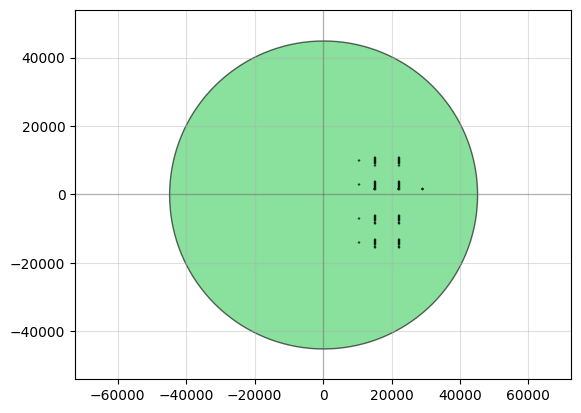

In [412]:
qp(wafer)

# Multimode Coupler Triad

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


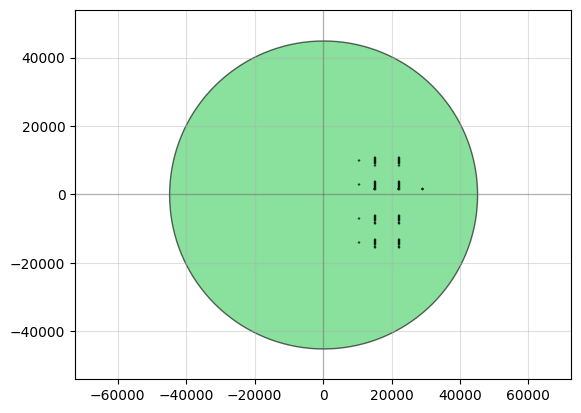

In [413]:
with open("multimode/chip_names_coupler.txt", "r") as f:
    chip_names_read = [line.strip() for line in f.readlines()]
coupler_files = chip_names_read[:3]
coupler_width = 5650
# Import the GDS structure
if activate_booleans['multimode-coupler']:
    for idx, file in enumerate(coupler_files):
        wafer, coupler_gap, coupler_pin = add_dxf_chip_to_wafer_junc(wafer, file, path, coupler_width, idx, x_offset=-35000, y_offset=-27000,
                                                    add_bool = True)
qp(wafer)

# Saving

In [414]:
wafer.write_gds(wafer.name + ".gds")

'Jaddu_coherence_qubits_juncs.gds'